# Introduction

This spam email detection project is a critical endeavor in email security. With a streamlined dataset containing spam and ham email text the project's primary aim is to classify and detect spam emails.

By using advanced machine learning techniques, this project empowers email services and users to automatically filter out and prevent the infiltration of unwanted, potentially harmful spam emails. It plays a crucial role in email security, enhancing user experience, and safeguarding against phishing and malicious content.

In [10]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline

In [11]:
# Define function to represent result
def get_result(predictions: np.ndarray) -> list:
    """Map the model predictions with the class name.

    Args:
        predictions (ndarray): The model predictions.
    
    Returns:
        list: The list of class name predictions.
    """
    list_res = [] 
    for pred in predictions.tolist(): 
        list_res.append({0: 'ham', 1: 'spam'}.get(pred))
    return list_res

## Eploratory Data Analysis

In [2]:
# Read the data
df = pd.read_csv("spam_email.csv", usecols = ['label', 'text', 'label_num'])
df.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


We have only three columns :  

- Label : whether it is a spam or not
- Text : email text message 
- Label num : if spam it is 1, or else it is 0

Now we will analyse our dataset, espacially the number of unique word by label.

In [3]:
# We have to drop numerical features to analyse text column
df.drop('label_num', axis=1).groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    3672   3531  Subject: calpine daily gas nomination\r\n>\r\n...   20
spam   1499   1462                                      Subject: \r\n   16

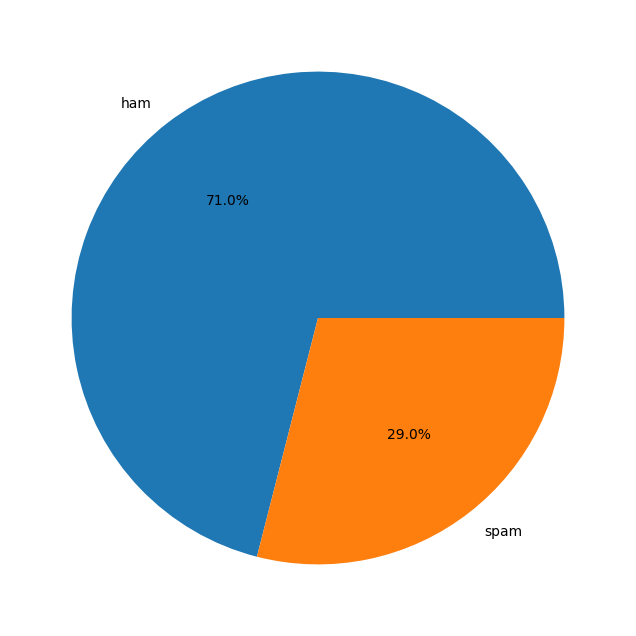

In [4]:
# Target balance
plt.figure(figsize = (12,8))
plt.pie(df['label'].value_counts(), labels=df['label'].unique(), autopct="%1.1f%%")
plt.show()

We have large set of unique words, but it wont prevent us from using vectorizer. 

Moreover, we can see we have an imbalanced dataset (this is normal when we deal with spam or fraud).  
But using machine learning algorithms like Naive Bayes, which are very powerful for spam detection, imbalanced dataset wont be an issue.

## Preprocessing

We will use CountVectorizer to count each word repetition on our dataset. It is very useful, because spam email usually uses a lot words like payment, $, money, etc.  
As said before, we will use Naive Bayes algorithm, but there are 3 differrent type of Naive Bayes. In our case, beacause we have discrete data (after CountVectorizer process), we will use Multinomial Naive Bayes algorithm. 

In [5]:
# Split into train and test set
(
    X_train,
    X_test,
    y_train,
    y_test
) = train_test_split(df['text'], df['label_num'], test_size=0.2)

To use the Naive Bayes algorithm, we always need to transform our data. So the best way to do this, is to define a pipeline. 

In [6]:
# Define pipeline
model = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('naivebayes', MultinomialNB())
])

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('naivebayes', MultinomialNB())])

Now our model is train, we can check result on test set.

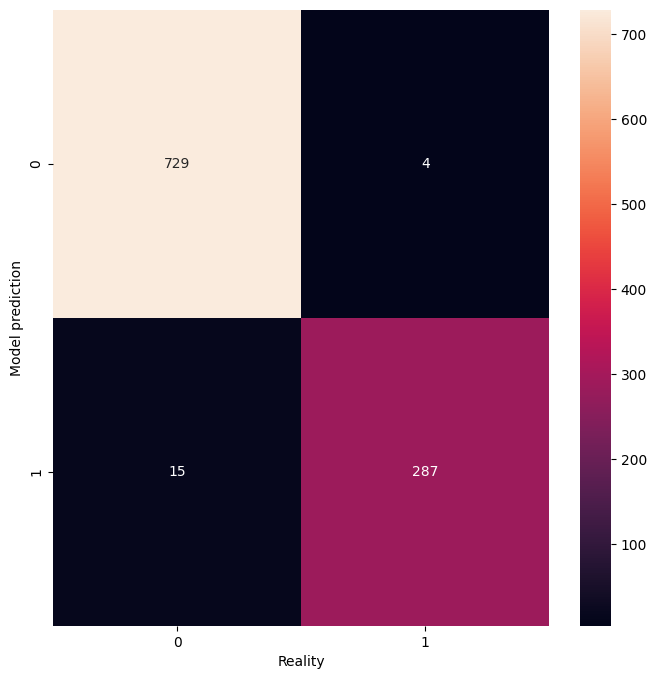

In [7]:
# Make prediction
y_pred = model.predict(X_test)

# Confusion matrix
plt.figure(figsize=(8,8))
sb.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
plt.xlabel("Reality")
plt.ylabel("Model prediction")
plt.show()

As you can see, our model is very good, and it make few mistakes.  
Now we can check the precision of it.

In [8]:
# Check model precision
model.score(X_test, y_test)

0.9816425120772947

It is a very high precision score. We can conclude that combine Vectorizer and Naive Bayes in a pipeline is very powerful for email spam detection. 

Now we will test our model with two email to ensure the good performance of it.

In [12]:
# Define emails
emails = [
    "Hey Adrien, can you rigth the minutes of yesterday's meeting please, I wasn't here. Thank you. Regards, Emil",
    "Upto 20% discount on parking, exclusive offer just for you. Click here to have this rewards"
]

# Make prediction
print(get_result(model.predict(emails)))

['ham', 'spam']


So the first email is not a spam, and the second one is a spam ! 

### Conclusion

Naive Bayes combine to Vectorizer are very powerful for spam detecttion, because spam email use a lot of words like money, discount, etc. So count these words help our algorithm to be better. Moreover, machine learning algorithms do not understand natural language, so we have to convert into number. 

Using a pipeline makes it easier to implement algorithm and make prediction. So it is also very powerful. 